<a href="https://colab.research.google.com/github/JasonChou0124/Solid-State-Physics-homework/blob/main/Solid_state_homework_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

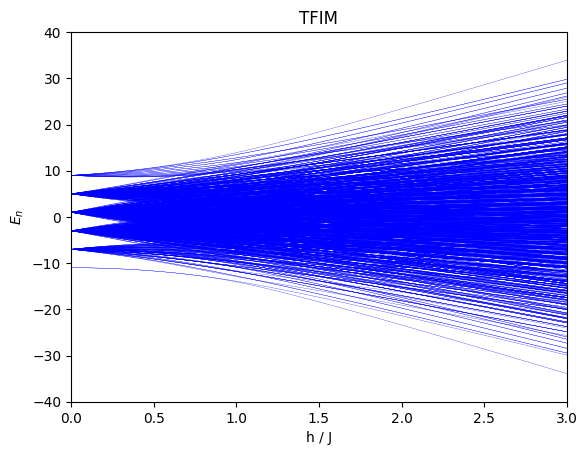

In [2]:
import numpy as np
import scipy.sparse as sparse
import matplotlib.pyplot as plt

def Hamiltonian(L, J, g, return_psi=False):
    sx = sparse.csr_matrix(np.array([[0., 1.], [1., 0.]]))
    sz = sparse.csr_matrix(np.array([[1., 0.], [0., -1.]]))
    id = sparse.csr_matrix(np.eye(2))

    sx_list = []
    sz_list = []

    for i_site in range(L):
        x_ops = [id] * L
        z_ops = [id] * L
        x_ops[i_site] = sx
        z_ops[i_site] = sz
        X = x_ops[0]
        Z = z_ops[0]

        for j in range(1, L):
            X = sparse.kron(X, x_ops[j], 'csr')
            Z = sparse.kron(Z, z_ops[j], 'csr')

        sx_list.append(X)
        sz_list.append(Z)

    H_xx = sparse.csr_matrix((2**L, 2**L))
    H_z = sparse.csr_matrix((2**L, 2**L))

    for i in range(L):
        H_xx = H_xx + sx_list[i] * sx_list[(i+1) % L]

    for i in range(L):
        H_z = H_z + sz_list[i]

    H = -J*H_xx -g*H_z
    eigenvalues = np.linalg.eigvalsh(H.toarray())
    return eigenvalues

g_value = np.linspace(0, 3, 100)
energy = [Hamiltonian(11, 1, g) for g in g_value]

plt.plot(g_value, energy,color='blue',linewidth = 0.2)
plt.xlabel('h / J')
plt.ylabel('$E_n$')
plt.xlim(0,3)
plt.ylim(-40,40)
plt.title('TFIM')
plt.savefig('plot.png', dpi=300)
plt.show()
